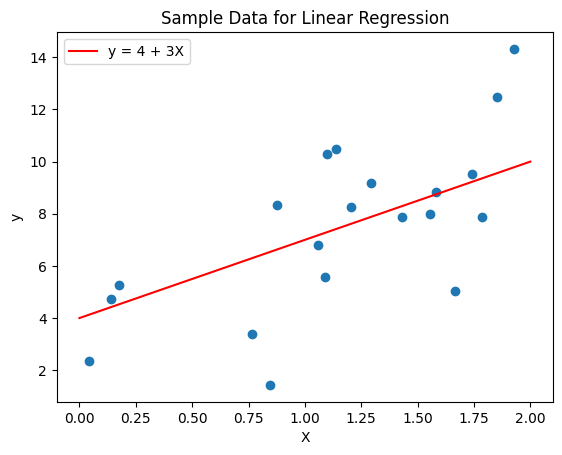

In [1]:
# sample data set for linear regression

import numpy as np
import matplotlib.pyplot as plt

# generate random data
np.random.seed(0)
X = 2 * np.random.rand(20, 1)
y = 4 + 3 * X + (2 * np.random.randn(20, 1))

# plot the data
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Sample Data for Linear Regression")
# plt.show()

# also plot the line 4 + 3X
X_line = np.array([[0], [2]])
y_line = 4 + 3 * X_line
plt.plot(X_line, y_line, color="red", label="y = 4 + 3X")
plt.legend()
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression


y_normalized = (y - np.mean(y)) / np.std(y)

# create and fit the model
model = LinearRegression()
model.fit(X, y_normalized)

# print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: [-1.44117726]
Coefficient: [[1.23907256]]


In [9]:
y.flatten(), y_normalized.flatten()

(array([10.28103917,  7.88081967,  8.24271566,  5.56110762,  1.43594916,
         9.18260187,  8.35439567,  7.86630796, 14.32148581,  3.39191776,
         8.84186726,  6.79900182, 10.4738258 , 12.49229737,  4.7361112 ,
         5.27910084,  2.34573889,  5.03412614,  7.97311621,  9.53277083]),
 array([ 0.8753133 ,  0.11950308,  0.23346128, -0.61095597, -1.90993588,
         0.52942405,  0.26862843,  0.11493346,  2.14761812, -1.29401677,
         0.4221294 , -0.22115284,  0.93602029,  1.57162109, -0.87074085,
        -0.69975769, -1.62345026, -0.77689829,  0.14856654,  0.63968949]))

In [10]:
# mean absolute error

y_pred = model.predict(X)
y_normalized_flat = y_normalized.flatten()  # flatten y_normalized to 1D array
y_pred = y_pred.flatten()  # flatten y_pred to 1D array

y_normalized_flat, y_pred

(array([ 0.8753133 ,  0.11950308,  0.23346128, -0.61095597, -1.90993588,
         0.52942405,  0.26862843,  0.11493346,  2.14761812, -1.29401677,
         0.4221294 , -0.22115284,  0.93602029,  1.57162109, -0.87074085,
        -0.69975769, -1.62345026, -0.77689829,  0.14856654,  0.63968949]),
 array([-0.08113774,  0.33116579,  0.05255787, -0.09087765, -0.39129918,
         0.15944209, -0.35677264,  0.76876566,  0.94691892, -0.49095352,
         0.52083229, -0.13049889, -0.03348039,  0.85258555, -1.26513959,
        -1.22525821, -1.39107313,  0.62217556,  0.48720811,  0.71483911]))

In [13]:
abs_error = np.abs(y_normalized_flat - y_pred)
abs_error

array([0.95645104, 0.21166271, 0.18090341, 0.52007832, 1.5186367 ,
       0.36998195, 0.62540107, 0.6538322 , 1.2006992 , 0.80306325,
       0.09870289, 0.09065395, 0.96950068, 0.71903555, 0.39439875,
       0.52550052, 0.23237713, 1.39907385, 0.33864157, 0.07514962])

In [14]:
mean_abs_error = np.mean(abs_error)
mean_abs_error

np.float64(0.5941872182128959)

In [15]:
# mean squared error

squared_error = (y_normalized_flat - y_pred) ** 2
squared_error

array([0.9147986 , 0.0448011 , 0.03272604, 0.27048146, 2.30625743,
       0.13688664, 0.3911265 , 0.42749655, 1.44167858, 0.64491058,
       0.00974226, 0.00821814, 0.93993157, 0.51701212, 0.15555037,
       0.2761508 , 0.05399913, 1.95740763, 0.11467811, 0.00564747])

In [16]:
mean_squared_error = np.mean(squared_error)
mean_squared_error

np.float64(0.5324750542799583)

In [17]:
import ipywidgets as widgets
from IPython.display import display


def visualize_mse(index):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Left plot: Show the data point and its prediction
    ax1.scatter(X, y_normalized, alpha=0.6, label="Actual data")
    ax1.plot(X, y_pred, color="red", linewidth=2, label="Regression line")

    # Highlight the selected point
    ax1.scatter(
        X[index],
        y_normalized_flat[index],
        color="blue",
        s=200,
        zorder=5,
        label="Selected point",
    )
    ax1.scatter(
        X[index],
        y_pred[index],
        color="green",
        s=200,
        marker="x",
        zorder=5,
        label="Prediction",
    )

    # Draw the error line
    ax1.plot(
        [X[index], X[index]],
        [y_normalized_flat[index], y_pred[index]],
        "k--",
        linewidth=2,
        label=f"Error: {abs(y_normalized_flat[index] - y_pred[index]):.3f}",
    )

    ax1.set_xlabel("X")
    ax1.set_ylabel("y (normalized)")
    ax1.set_title("Linear Regression: Actual vs Predicted")
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Right plot: Visualize squared error
    error = y_normalized_flat[index] - y_pred[index]
    squared_error_val = error**2

    # Draw a square representing the squared error
    if error != 0:
        square_size = abs(error)
        square = plt.Rectangle(
            (0, 0),
            square_size,
            square_size,
            fill=True,
            alpha=0.3,
            color="red",
            edgecolor="black",
            linewidth=2,
        )
        ax2.add_patch(square)
        ax2.plot([0, square_size], [0, 0], "k-", linewidth=2)
        ax2.plot([0, 0], [0, square_size], "k-", linewidth=2)
        ax2.set_xlim(-0.1, max(1.5, square_size + 0.2))
        ax2.set_ylim(-0.1, max(1.5, square_size + 0.2))
    else:
        ax2.set_xlim(-0.1, 1.5)
        ax2.set_ylim(-0.1, 1.5)

    ax2.set_aspect("equal")
    ax2.set_xlabel("Error magnitude")
    ax2.set_ylabel("Error magnitude")
    ax2.set_title(
        f"Squared Error Visualization\nError: {error:.3f}\nSquared Error: {squared_error_val:.4f}"
    )
    ax2.grid(True, alpha=0.3)

    # Add text showing the calculation
    ax2.text(
        0.02,
        0.98,
        f"Point {index}:\nActual: {y_normalized_flat[index]:.3f}\nPredicted: {y_pred[index]:.3f}\n\nError = {error:.3f}\nError² = {squared_error_val:.4f}",
        transform=ax2.transAxes,
        fontsize=10,
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5),
    )

    plt.tight_layout()
    plt.show()

    # Print MSE information
    print(f"\n{'=' * 60}")
    print(f"Point {index} Analysis:")
    print(f"{'=' * 60}")
    print(f"Actual value: {y_normalized_flat[index]:.4f}")
    print(f"Predicted value: {y_pred[index]:.4f}")
    print(f"Error: {error:.4f}")
    print(f"Squared Error: {squared_error_val:.4f}")
    print(f"\nMean Squared Error (all points): {mean_squared_error:.4f}")
    print(
        f"This point's contribution to MSE: {squared_error_val / len(y_normalized_flat):.4f} ({squared_error_val / mean_squared_error / len(y_normalized_flat) * 100:.2f}%)"
    )


# Create interactive slider
slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(X) - 1,
    step=1,
    description="Data Point:",
    continuous_update=False,
)

# Display the interactive widget
interactive_plot = widgets.interactive(visualize_mse, index=slider)
display(interactive_plot)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Data Point:', max=19), Output()…

============================================================
Point 0 Analysis:
============================================================
Actual value: 0.8753
Predicted value: -0.0811
Error: 0.9565
Squared Error: 0.9148


Mean Squared Error (all points): 0.5325
This point's contribution to MSE: 0.0457 (8.59%)

============================================================
Point 2 Analysis:
============================================================
Actual value: 0.2335
Predicted value: 0.0526
Error: 0.1809
Squared Error: 0.0327

Mean Squared Error (all points): 0.5325
This point's contribution to MSE: 0.0016 (0.31%)

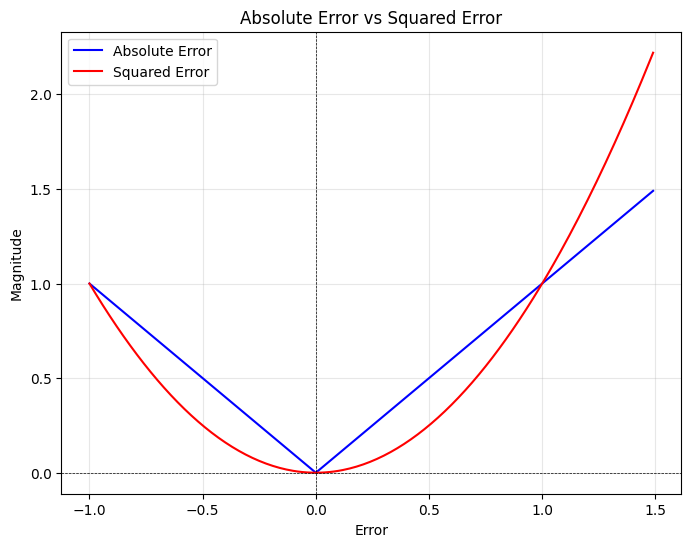

In [18]:
# relation between absolute error and squared error with a graph

i = np.arange(-1, 1.5, 0.01)
j = i**2

plt.figure(figsize=(8, 6))
plt.plot(i, np.abs(i), label="Absolute Error", color="blue")
plt.plot(i, j, label="Squared Error", color="red")
plt.xlabel("Error")
plt.ylabel("Magnitude")
plt.title("Absolute Error vs Squared Error")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

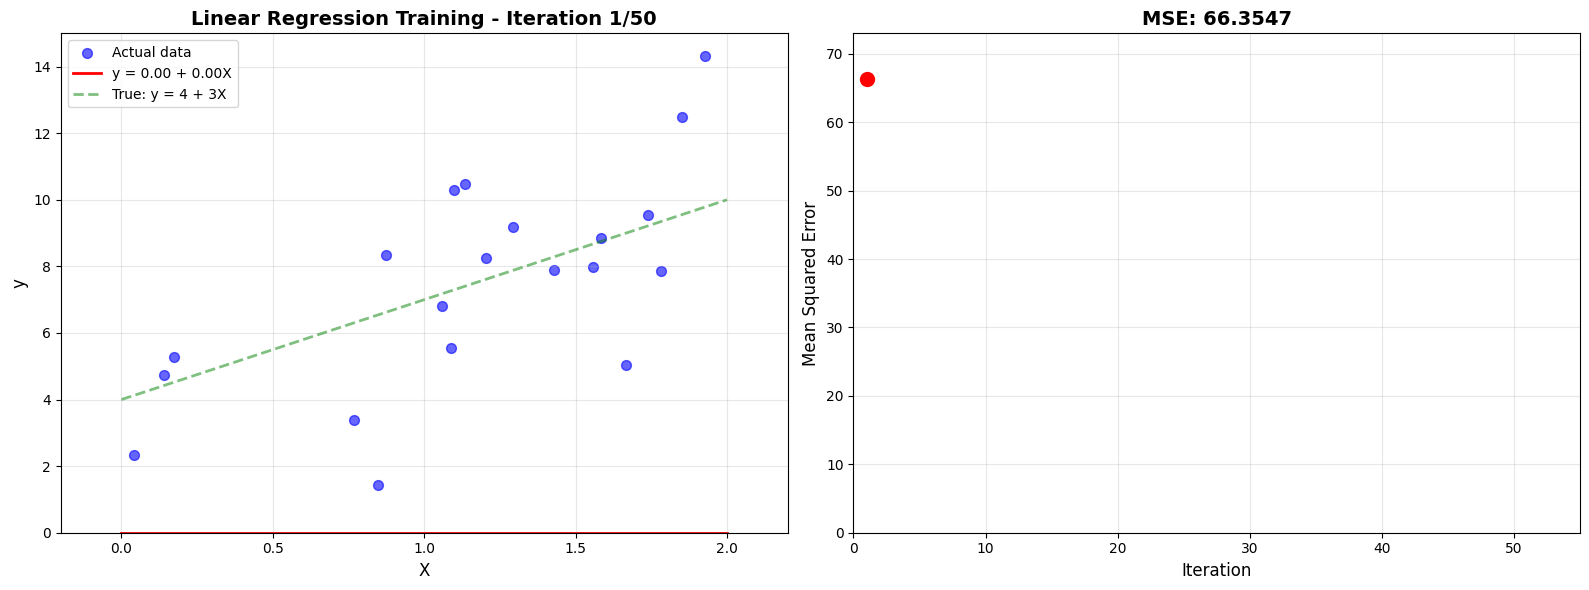

In [23]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create training history (simulating gradient descent)
# history stores (theta_0, theta_1, mse) for each iteration
history = []
theta_0, theta_1 = 0, 0  # Initial parameters
learning_rate = 0.1
num_iterations = 50

for iteration in range(num_iterations):
    # Calculate predictions
    y_pred_train = theta_0 + theta_1 * X.flatten()

    # Calculate errors
    errors = y.flatten() - y_pred_train

    # Calculate MSE
    mse = np.mean(errors**2)

    # Store history
    history.append((theta_0, theta_1, mse))

    # Update parameters (gradient descent)
    theta_0 = theta_0 + learning_rate * np.mean(errors)
    theta_1 = theta_1 + learning_rate * np.mean(errors * X.flatten())

# Create animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


def animate(frame):
    ax1.clear()
    ax2.clear()

    # Get current parameters
    theta_0_current, theta_1_current, mse_current = history[frame]

    # Left plot: Data and regression line
    ax1.scatter(X, y, alpha=0.6, s=50, label="Actual data", color="blue")

    # Plot current regression line
    X_line_anim = np.array([0, 2])
    y_line_anim = theta_0_current + theta_1_current * X_line_anim
    ax1.plot(
        X_line_anim,
        y_line_anim,
        color="red",
        linewidth=2,
        label=f"y = {theta_0_current:.2f} + {theta_1_current:.2f}X",
    )

    # Plot true line for reference
    y_true_line = 4 + 3 * X_line_anim
    ax1.plot(
        X_line_anim,
        y_true_line,
        color="green",
        linewidth=2,
        linestyle="--",
        alpha=0.5,
        label="True: y = 4 + 3X",
    )

    ax1.set_xlabel("X", fontsize=12)
    ax1.set_ylabel("y", fontsize=12)
    ax1.set_title(
        f"Linear Regression Training - Iteration {frame + 1}/{len(history)}",
        fontsize=14,
        fontweight="bold",
    )
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(-0.2, 2.2)
    ax1.set_ylim(0, 15)

    # Right plot: MSE over time
    iterations_so_far = list(range(1, frame + 2))
    mse_so_far = [h[2] for h in history[: frame + 1]]

    ax2.plot(iterations_so_far, mse_so_far, color="purple", linewidth=2)
    ax2.scatter([frame + 1], [mse_current], color="red", s=100, zorder=5)
    ax2.set_xlabel("Iteration", fontsize=12)
    ax2.set_ylabel("Mean Squared Error", fontsize=12)
    ax2.set_title(f"MSE: {mse_current:.4f}", fontsize=14, fontweight="bold")
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(0, len(history) + 5)

    # Set y-limit based on max MSE for stability
    max_mse = max([h[2] for h in history])
    ax2.set_ylim(0, max_mse * 1.1)

    plt.tight_layout()


# Create animation
anim = FuncAnimation(fig, animate, frames=len(history), interval=100, repeat=True)

# Display animation
display(HTML(anim.to_jshtml()))